# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

In Statistical Mechanics the Maxwell–Boltzmann distribution (<a href="https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution" target="_blank">Link Wikipedia</a>) is a probability distribution used for describing particle speeds in idealized gases. However, rarefied gases at ordinary temperatures behave very nearly like an ideal gas and the Maxwell–Boltzmann speed distribution is an excellent approximation for such gases. For a 3D system its formula is:
$$p(v,T) = \left( \frac{m}{2\pi k_B T} \right)^{3/2} 4\pi v^2 e^{-\frac{m v^2}{2 k_B T}}$$

By using LJ reduced units (Lenght: $\sigma$; Energy: $\epsilon$; Mass: the mass, $m$, of the particles; Temperature: $\epsilon/k_B$; velocity: $\sqrt{\epsilon/m}$) its form becomes:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

The NSL_SIMULATOR code already computes the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

<span style="color:red">Include the calculation of the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, inside your Molecular Dynamics code by using data blocking to obtain single block averages, progressive average values and progressive uncertainties for $p(v^*,T^*)$.</span>

Remember that, the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, can be approximately computed as a **normalized histogram** on an appropriate interval $\left[ 0, v_{max}\right]$ and chosing the number of bins into which you want to divide this interval.

### Exercise 04.2

By means of your upgraded code, perform MD simulations via a Lennard-Jones model ( e.g. Argon parameters: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- gas phase: $\rho^\star = 0.05$, $T^\star \sim  2.0$ (cut-off radius: $r_c = 5.0$)

starting from a **very low entropic** initial configuration:
1. initial **particle positions**: fcc crystal occupying half of the simulation box in each dimension
2. initial **velocity distribution**: $p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$ where $v_{T^*}$ is suitably connected to $T^*$. For example, this condition could be obtained by imposing that every particle has an initial velocity $\pm v_{T^*}$ for **only one** of its velocity components: $v_x$, $v_y$, $v_z$.

The goal is to show that, by evolving such initial condition via a Molecular Dynamics simulation, the velocity distribution tends to approximate the Maxwell–Boltzmann distribution.

- **Produce some pictures that show this convergence**
- The evolution of the system moves towards the increasing of entropy (more homeogeneous configuration of particles)? What would you find by changing the direction of time? Comment on these aspects in your jupyter-notebook

**Note that** the MD simulation will conserve the total energy; thus the kinetic energy and the temperature are not constant of motion ... the comparison should be done with $p(v^*,T^*_{\rm eff})$ where $T^*_{\rm eff}$ is the effective temperature obtained once the system has been equilibrated.

### Exercise 04.3

Starting from the final state of an **equilibrated** MD simulation of the system in Exercise 04.2, by changing the direction of time (e.g. by inverting the final velocities, i.e. ... ), try to return back to the very low entropic initial configuration of Exercise 04.2. Is this possible? (for example, one can monitor the behavior of the average **potential energy** and the average **temperature** in **each block** as a function of time going **in both directions**. Show some picture and comment on what you find in your jupyter-notebook.

### Solutions 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})


#### Exercise 04.1

I implemented the calculation of the Maxwell–Boltzmann velocity distribution $p(v^*, T^*)$ within the Molecular Dynamics code. The distribution is estimated by constructing a normalized histogram of particle speeds in reduced units. To ensure better resolution of the distribution around its peak, I chose a bin size proportional to $\sqrt{T}$, specifically: $\text{bin\_size\_v} = \frac{4.0 \cdot \sqrt{T}}{N_{\text{bins}}}$ with 30 bins. This corresponds to evaluating the histogram on the interval $[0, v_{\text{max}}]$ where $v_{\text{max}} = 4 \cdot \sqrt{T}$. This range is chosen because the Maxwell–Boltzmann distribution has a peak at speeds of the order of $\sqrt{T}$ and decays quickly for larger velocities, so taking a multiple of $\sqrt{T}$ ensures that the full shape of the distribution, including its tails, is well captured.

The histogram counts are normalized by the number of particles and the bin width to correctly approximate a probability density function. The simulation is divided into 20 blocks, each consisting of 3000 steps, allowing for the application of data blocking to compute single block averages, progressive averages, and uncertainties of $p(v^*, T^*)$. Although the simulation starts from an initial temperature, in the below graph the Maxwell–Boltzmann distribution is compared to the theoretical form at the **final (equilibrium)** temperature, reflecting the system's steady-state behavior. $T^*$ is the mean of the last five blocks istant values of temperature.



Despite the small magnitude of the statistical uncertainties (which are barely visible), the agreement between simulation and theory is excellent. The two curves show very similar behavior, confirming that the simulation correctly reproduces the expected Maxwell–Boltzmann velocity distribution at equilibrium.
To further highlight the quality of the agreement, a residuals plot is also provided, showing the small differences between the simulated and theoretical values.


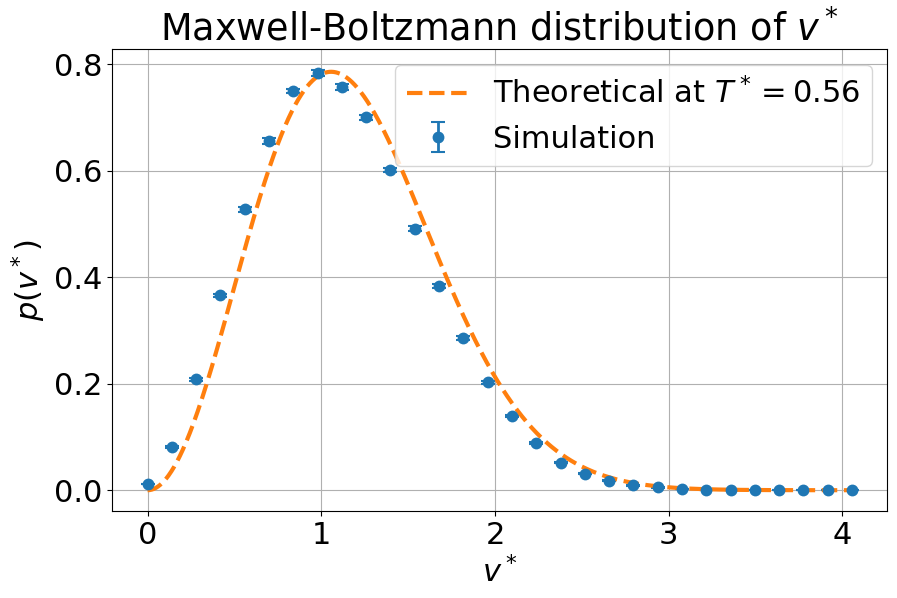

In [16]:
m = 1.
kb = 1.0  
T = np.loadtxt("es_04.1/OUTPUT/temperature.dat", skiprows=1)
T_eq = T[-5:,1].mean()  #  mean temperature of the last 5 blocks

block = 20
bins = 30
data = np.loadtxt("es_04.1/OUTPUT/pofv.dat", skiprows=1)
velocity = data[block * bins - bins : , 1]  # bin centers
pofv = data[block * bins - bins:, 3]      # last progressive average of p(v)
error = data[block * bins - bins:, 4]     # mean error of p(v)

v_theory = np.linspace(0, max(velocity), 1000) 
p_theory = 4 * np.pi * v_theory**2 * (m / (2 * np.pi * kb * T_eq))**(3/2) * np.exp(-m * v_theory**2 / (2 * kb * T_eq))
p_theory /= np.trapz(p_theory, v_theory) # normalize

plt.figure(figsize=(10, 6))
plt.errorbar(velocity, pofv, yerr=error, fmt='o', label="Simulation",ms=7, capsize=5, elinewidth=2, markeredgewidth=1.5, lw=3)
plt.plot(v_theory, p_theory, label= r"Theoretical at $T^* = {:.2f}$".format(T_eq), linestyle="dashed", lw=3)

plt.xlabel(r"$v^*$")
plt.ylabel(r"$p(v^*)$")
plt.legend()
plt.grid()
plt.title(r"Maxwell-Boltzmann distribution of $v^*$")
plt.show()


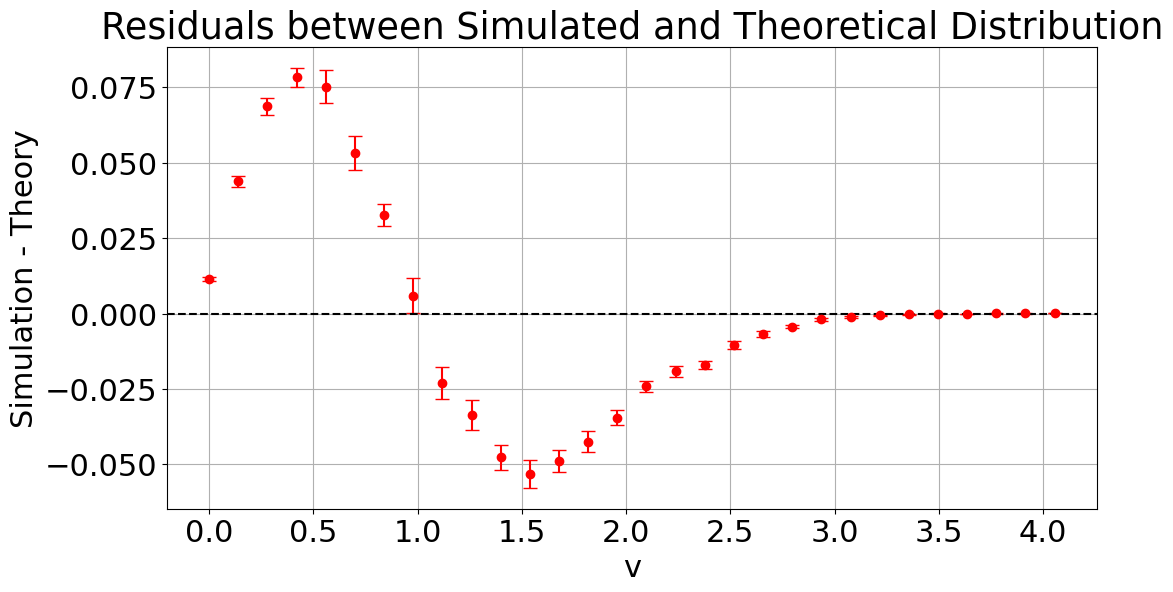

In [17]:
plt.figure(figsize=(12, 6))
residuals = pofv - np.interp(velocity, v_theory, p_theory)
plt.errorbar(velocity, residuals, yerr=error, fmt='o', color='red', capsize=5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("v")
plt.ylabel("Simulation - Theory")
plt.title("Residuals between Simulated and Theoretical Distribution")
plt.grid()
plt.show()


#### Exercise 04.2

I performed a Molecular Dynamics simulation of a Lennard-Jones gas starting from a highly ordered, low-entropy configuration: particles placed in an fcc crystal confined to half the box, with velocities drawn from a delta distribution $p_\delta(v^*, T^*) = \delta(v^* - v_{T^*})$. I set the characteristic velocity $v_{T^*}$ as $\sqrt{3T^*}$, following the kinetic theory of gases, where $\sqrt{\langle v^2 \rangle} = \sqrt{3T^*}$ represents the root-mean-square velocity of particles in three dimensions. 

Over time, the system evolves towards equilibrium, where the velocity distribution converges to the Maxwell–Boltzmann form at the final effective temperature $T^*$. In the figures below, I compare the velocity histograms after blocks 1, 10, and 20 with the theoretical Maxwell–Boltzmann curve. As previous exercise I made 3000 steps per block and $T^*$ is the mean of the last five blocks istant values of temperature. Each histogram is obtained using data blocking, and the plotted distributions represent the progressive block average along with the statistical uncertainties.

As expected, the initial histogram (block 1) is sharply peaked and deviates significantly from the theoretical curve. As the simulation progresses, the distribution broadens and shifts, eventually overlapping well with the Maxwell–Boltzmann distribution. This behavior reflects the thermalization process, where the system transitions from a low-entropy, non-equilibrium state to a high-entropy equilibrium state.

This relaxation process is a clear manifestation of the second law of thermodynamics: the entropy of an isolated system tends to increase over time. Starting from a highly ordered and inhomogeneous initial state (particles arranged in a half-box fcc crystal with a non-thermal velocity distribution), the system evolves towards a more spatially uniform and dynamically randomized configuration. Both the particle positions and the velocity distribution become more homogeneous, consistent with the statistical expectation of entropy increase in an isolated system.

If I was to reverse the direction of time—by inverting all particle velocities—the system would, in theory, retrace its trajectory back to the initial low-entropy state. This is possible because the underlying equations of motion are time-reversible. However, such a reversal is practically unachievable due to the extreme sensitivity to initial conditions (chaos) and the improbability of all microscopic degrees of freedom aligning perfectly. This highlights the fundamental distinction between microscopic reversibility and macroscopic irreversibility, and how the arrow of time emerges from statistical behavior, not the dynamics themselves.



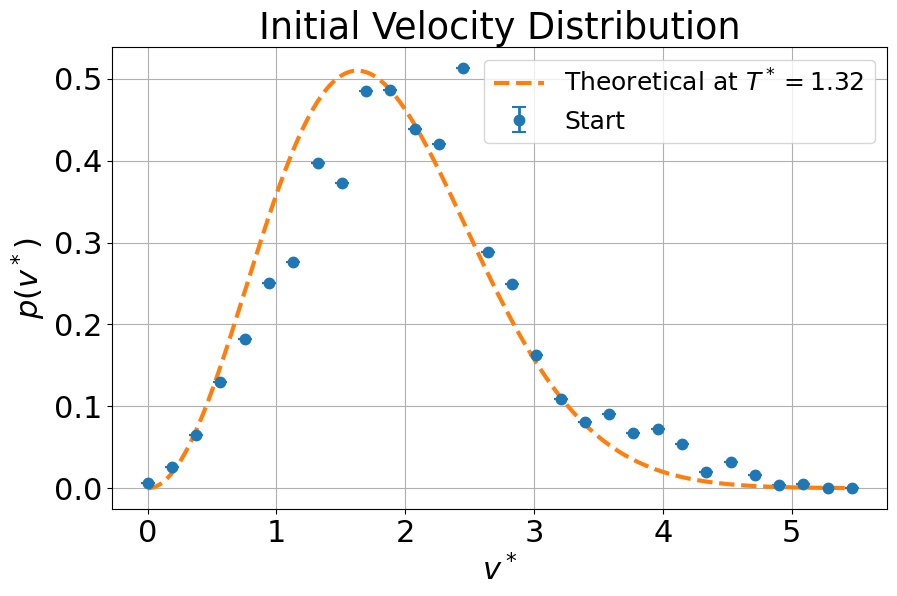

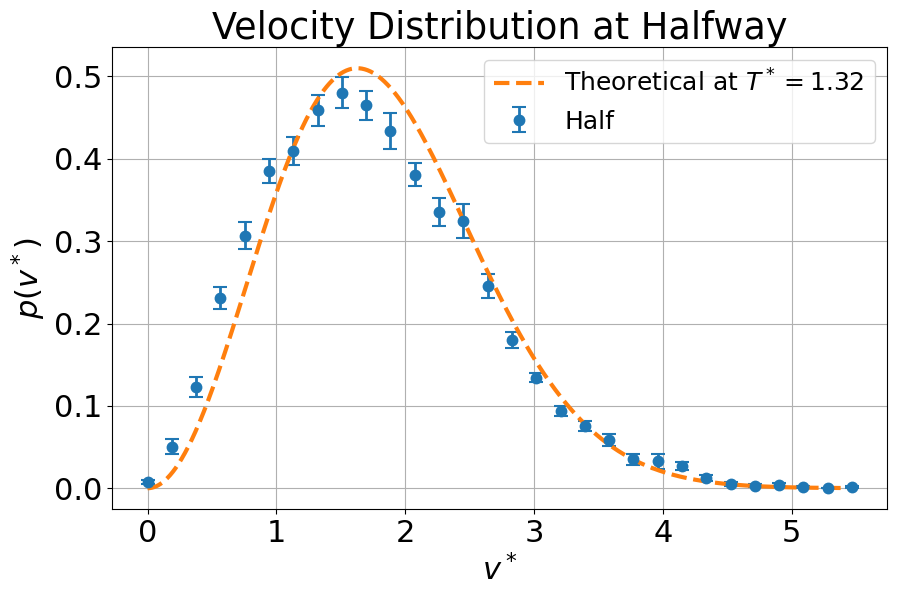

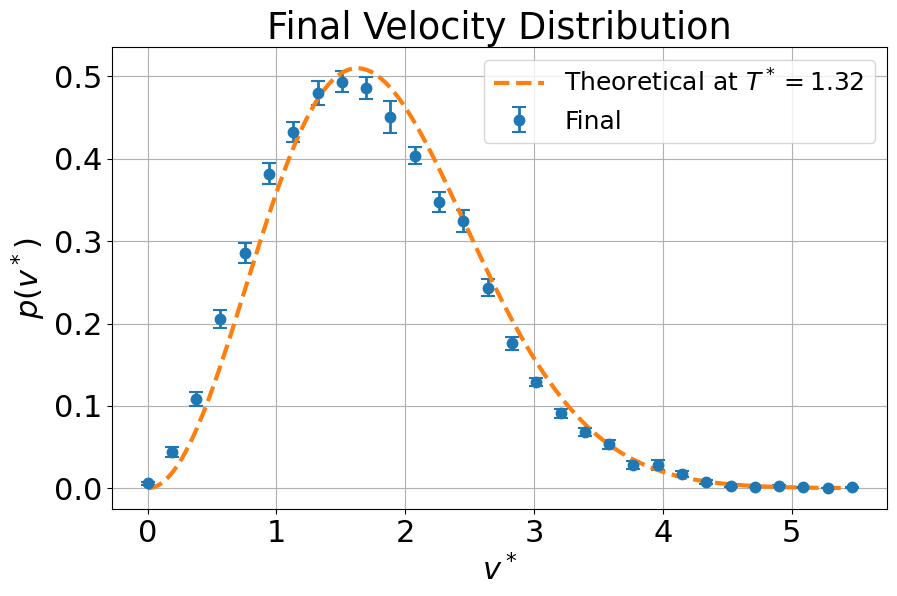

In [18]:
# Parameters
m = 1.0
kb = 1.0  
T = np.loadtxt("es_04.2/OUTPUT/temperature.dat", skiprows=1)
T_eq = T[-5:, 1].mean()  # mean temperature of the last 5 blocks

block = 20
bins = 30
data = np.loadtxt("es_04.2/OUTPUT/pofv.dat", skiprows=1)
velocity = data[block * bins - bins:, 1]  # bin centers

# Initial values of p(v) and error
pofv_i = data[:bins, 3]
error_i = data[:bins, 4]

# Half block progressive average of p(v) and error
pofv_m = data[bins * 10 : bins * 11, 3]
error_m = data[bins * 10 : bins * 11, 4]

# Final values of p(v) and error
pofv_f = data[block * bins - bins:, 3]      
error_f = data[block * bins - bins:, 4]      

# Theoretical Maxwell–Boltzmann distribution
v_theory = np.linspace(0, max(velocity), 1000) 
p_theory = 4 * np.pi * v_theory**2 * (m / (2 * np.pi * kb * T_eq))**(3/2) * np.exp(-m * v_theory**2 / (2 * kb * T_eq))
p_theory /= np.trapz(p_theory, v_theory)


plt.figure(figsize=(10, 6))
plt.errorbar(velocity, pofv_i, yerr=error_i, fmt='o', label="Start", ms=7, capsize=5, elinewidth=2, markeredgewidth=1.5)
plt.plot(v_theory, p_theory, label=r"Theoretical at $T^* = {:.2f}$".format(T_eq), linestyle="dashed", lw=3)
plt.xlabel(r"$v^*$")
plt.ylabel(r"$p(v^*)$")
plt.title(r"Initial Velocity Distribution")
plt.legend(fontsize = 18)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(velocity, pofv_m, yerr=error_m, fmt='o', label="Half", ms=7, capsize=5, elinewidth=2, markeredgewidth=1.5)
plt.plot(v_theory, p_theory, label=r"Theoretical at $T^* = {:.2f}$".format(T_eq), linestyle="dashed", lw=3)
plt.xlabel(r"$v^*$")
plt.ylabel(r"$p(v^*)$")
plt.title(r"Velocity Distribution at Halfway")
plt.legend(fontsize = 18)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(velocity, pofv_f, yerr=error_f, fmt='o', label="Final", ms=7, capsize=5, elinewidth=2, markeredgewidth=1.5)
plt.plot(v_theory, p_theory, label=r"Theoretical at $T^* = {:.2f}$".format(T_eq), linestyle="dashed", lw=3)
plt.xlabel(r"$v^*$")
plt.ylabel(r"$p(v^*)$")
plt.title(r"Final Velocity Distribution")
plt.legend(fontsize = 18)
plt.grid()
plt.show()


#### Exercise 04.3



To investigate the time-reversibility of the system, I perform a second simulation starting from the **final equilibrium state** of the previous run. However, instead of simply inverting the particle velocities $\vec{v}_i \rightarrow -\vec{v}_i$, which would be ineffective for the Verlet integrator since velocities are not directly used in position updates, I invert the positions corresponding to times $t$ and $t - \Delta t$ from the previous simulation by swapping them as the “old” (at $t - \Delta t$) and “new” (at $t$) positions for the backward simulation. This inversion of positional data effectively reverses the direction of time in the Verlet integration scheme.


In theory, since Newton’s equations of motion are time-reversible and the system conserves total energy, this procedure should cause the trajectory to retrace itself back to the original low-entropy initial configuration. However, this perfect reversibility is not observed in practice.

There are three main reasons for this:

* The Molecular Dynamics simulation uses a numerical integration method (Verlet integrator) that approximates continuous motion via discrete time steps. This introduces small rounding errors at every step, which accumulate and are not perfectly canceled when the simulation is run backward.

* The many-body nature of the system causes even minute deviations to be exponentially amplified over time, leading the backward trajectory to quickly diverge from the exact reversed path.

<!-- * Physically, the system evolves forward from a low-entropy, ordered state toward thermal equilibrium characterized by a Maxwell–Boltzmann velocity distribution. When time is reversed, the system does not spontaneously return to the original ordered state but instead continues to explore higher-entropy configurations. This reflects the statistical irreversibility expressed by the **Second Law of Thermodynamics**: although the microscopic equations are reversible, the emergent statistical behavior is not. -->

To compare the forward and backward dynamics, I have plotted the **average temperature** and **kinetic energy** as functions of time (block index), reversing the time axis for the backward simulation. For 5 blocks, the backward simulation closely follows the forward trajectory, but subsequently diverges and fails to return to the initial low-entropy state, due to the reasons described above.

The plots clearly show that the evolution is not symmetric in time and that entropy does not decrease when time is reversed.



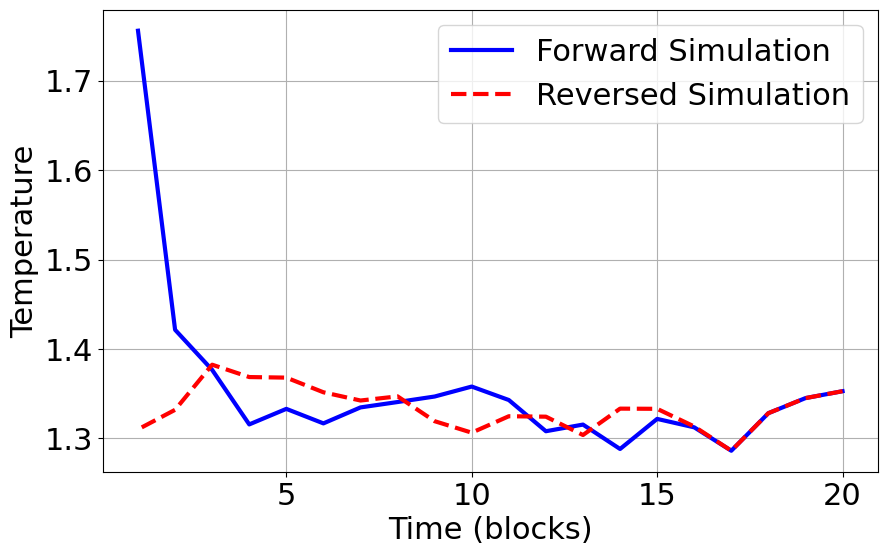

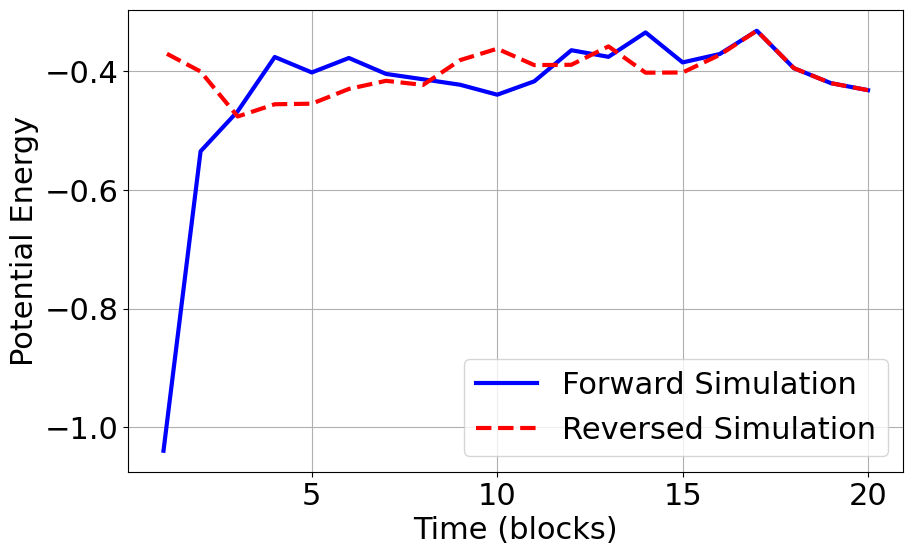

In [5]:
temp_forward = np.loadtxt("es_04.2/OUTPUT/temperature.dat", skiprows=1)
temp_backward = np.loadtxt("es_04.3/OUTPUT/temperature.dat", skiprows=1)

U_forward = np.loadtxt("es_04.2/OUTPUT/potential_energy.dat", skiprows=1)
U_backward = np.loadtxt("es_04.3/OUTPUT/potential_energy.dat", skiprows=1)

plt.figure(figsize=(10, 6))
plt.plot(temp_forward[:,0], temp_forward[:,1], label="Forward Simulation", color="blue", lw=3)
# Reverse the time axis for backward simulation
temp_backward[:,0] = temp_backward[:,0][::-1]  # Reverse time
plt.plot(temp_backward[:,0], temp_backward[:,1], label="Reversed Simulation", color="red", linestyle="dashed", lw=3)

plt.xlabel("Time (blocks)")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(U_forward[:,0], U_forward[:,1], label="Forward Simulation", color="blue", lw=3)
U_backward[:,0] = U_backward[:,0][::-1]  # Reverse time
plt.plot(U_backward[:,0], U_backward[:,1], label="Reversed Simulation", color="red", linestyle="dashed", lw=3)

plt.xlabel("Time (blocks)")
plt.ylabel("Potential Energy")
plt.legend()
plt.grid()
plt.show()